In [ ]:
###### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

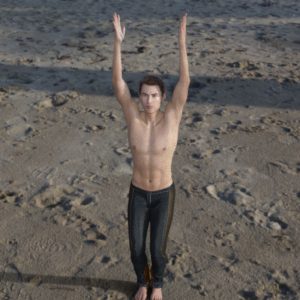

In [3]:
img = image.load_img("../input/yogapose/test/chair/guy3_chair070.jpg")
img

In [4]:
import cv2
img_num = cv2.imread("../input/yogapose/test/chair/guy3_chair070.jpg")
img_num.shape


(300, 300, 3)

In [5]:
### train = ImageDataGenerator(rescale = 1/255)
train = ImageDataGenerator(rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images



valid = ImageDataGenerator(rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images 

In [6]:
train_dataset = train.flow_from_directory(
        '../input/yogapose/train',
        target_size=(300, 300),  
        class_mode='binary')
validation_dataset = valid.flow_from_directory(
        '../input/yogapose/test',
        target_size=(300, 300),
        class_mode='binary')

Found 1000 images belonging to 5 classes.
Found 495 images belonging to 5 classes.


In [7]:
train_dataset.class_indices


{'chair': 0, 'cobra': 1, 'dog': 2, 'tree': 3, 'warrior': 4}

In [8]:
# Create the base model of VGG19
vgg19 = VGG19( include_top=False, input_shape = (300, 300, 3) , weights = 'imagenet')

In [9]:
vgg19.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [10]:
model = Sequential()

for layer in vgg19.layers[:-1]: # this is where I changed your code
    model.add(layer)    
# Freeze the layers 
#for layer in model.layers:
#    layer.trainable = False

In [11]:
model.add(Flatten())
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 75, 75, 256)       2

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs = 5 , batch_size = 64)
history

Epoch 1/5
32/32 [==============================] - 51s 1s/step - loss: -15.3957 - accuracy: 0.1907 - val_loss: -572.9857 - val_accuracy: 0.2343
Epoch 2/5
32/32 [==============================] - 38s 1s/step - loss: -19693.3233 - accuracy: 0.2274 - val_loss: -711197.3750 - val_accuracy: 0.2343
Epoch 3/5
32/32 [==============================] - 38s 1s/step - loss: -10641199.6610 - accuracy: 0.2077 - val_loss: -289473184.0000 - val_accuracy: 0.2343
Epoch 4/5
32/32 [==============================] - 38s 1s/step - loss: -2981307758.0606 - accuracy: 0.1969 - val_loss: -64160899072.0000 - val_accuracy: 0.2343
Epoch 5/5
32/32 [==============================] - 38s 1s/step - loss: -443133718652.1212 - accuracy: 0.2013 - val_loss: -7356590063616.0000 - val_accuracy: 0.2343


In [15]:


import csv
import cv2
import itertools
import numpy as np
import pandas as pd
import os
import sys
import tempfile
import tqdm

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:

pose_sample_rpi_path = os.path.join(os.getcwd(), 'examples/lite/examples/pose_estimation/raspberry_pi')
sys.path.append(pose_sample_rpi_path)

In [17]:
import utils
from movenet import Movenet
movenet = Movenet('movenet_thunder')

In [18]:
movenet.detect(img_num)[:,0:2].shape

(17, 2)


# detect pose landmarks and them into npy file

In [19]:
def MoveNetPreprocessor(pose_folder_path) : 
    train_pose_landmarks = np.array([]).reshape(0,17,2)
    label_train_pose_landmarks = np.array([]).reshape(0,)
    i = 0
    folders = os.listdir(pose_folder_path)
    for path_1 in folders : 
        image = os.listdir(pose_folder_path + '/'+ path_1)
        for img in image : 
            num_img = cv2.imread(pose_folder_path + '/'+ path_1 + '/' + img)
            pose_landmarks = movenet.detect(num_img)[:,0:2].reshape(1,17,2) 
            train_pose_landmarks = np.vstack([train_pose_landmarks,pose_landmarks])
            label_train_pose_landmarks = np.append(label_train_pose_landmarks , i)
        i += 1
    np.save('./train_pose_landmarks.npy' ,train_pose_landmarks)
    np.save('./label_train_pose_landmarks.npy' ,label_train_pose_landmarks)
    return train_pose_landmarks, label_train_pose_landmarks
            

In [20]:
X_train, y_train = MoveNetPreprocessor('../input/yogapose/train')

In [21]:
X_train.shape

(1000, 17, 2)

In [22]:
X_test, y_test = MoveNetPreprocessor('../input/yogapose/test')

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train , test_size=0.15, random_state=42)

In [24]:
X_train.shape

(850, 17, 2)

In [91]:
model = models.Sequential([
          layers.Flatten(),
          layers.Dense(128,activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(64,activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(5,activation='softmax'),

])
model.build((0,17,2))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (0, 34)                   0         
_________________________________________________________________
dense_20 (Dense)             (0, 128)                  4480      
_________________________________________________________________
dropout_12 (Dropout)         (0, 128)                  0         
_________________________________________________________________
dense_21 (Dense)             (0, 64)                   8256      
_________________________________________________________________
dropout_13 (Dropout)         (0, 64)                   0         
_________________________________________________________________
dense_22 (Dense)             (0, 5)                    325       
Total params: 13,061
Trainable params: 13,061
Non-trainable params: 0
__________________________________________________

In [87]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history = model.fit(x = X_train,y = y_train , batch_size = 16 , epochs = 50  , shuffle=True)
history

Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 1.6560 - accuracy: 0.2132
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 1.6048 - accuracy: 0.2343
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 1.5880 - accuracy: 0.2815
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 1.5727 - accuracy: 0.2681
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 1.5199 - accuracy: 0.3320
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 1.4596 - accuracy: 0.3708
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 1.3458 - accuracy: 0.4308
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 1.2555 - accuracy: 0.4578
Epoch 9/50
54/54 [==============================] - 0s 2ms/step - loss: 1.1984 - accuracy: 0.4723
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 1.1820 - accuracy: 0.5073
Epoch 11/50
54/54 [

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Add a checkpoint callback to store the checkpoint that has the highest
# validation accuracy.
checkpoint_path = "weights.best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              patience=20)

# Start training
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, earlystopping])

In [95]:
# Evaluate the model using the TEST dataset
loss, accuracy = model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9313


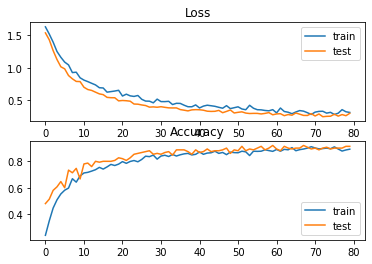

In [32]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [79]:
arr_1 = np.array([]).reshape(0,34)
for i in range(len(X_test)) :
    b = np.append(X_test[i][:,0] , X_test[i][:,1])
    arr_1 = np.vstack([arr_1 ,b ])
